# COVID-19 Dataset
https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not. 

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- `sex`: 1 for female and 2 for male.
- `age`: of the patient.
- `classification`: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
- `degrees`. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- `patient` type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- `pneumonia`: whether the patient already have air sacs inflammation or not.
- `pregnancy`: whether the patient is pregnant or not.
- `diabetes`: whether the patient has diabetes or not.
- `copd`: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- `asthma`: whether the patient has asthma or not.
- `inmsupr`: whether the patient is immunosuppressed or not.
- `hypertension`: whether the patient has hypertension or not.
- `cardiovascular`: whether the patient has heart or blood vessels related disease.
- `renal chronic`: whether the patient has chronic renal disease or not.
- `other disease`: whether the patient has other disease or not.
- `obesity`: whether the patient is obese or not.
- `tobacco`: whether the patient is a tobacco user.
- `usmr`: Indicates whether the patient treated medical units of the first, second or third level.
- `medical` unit: type of institution of the National Health System that provided the care.
- `intubed`: whether the patient was connected to the ventilator.
- `icu`: Indicates whether the patient had been admitted to an Intensive Care Unit.
- `date died`: If the patient died indicate the date of death, and 9999-99-99 otherwise.

CONSIDERATIONS: 
- This dataset doesn't contain a target column. You have to generate the target column considering the people that died or not (field `date died`)
- The dataset maybe it's unbalance. Have this into consideration for your analysis
- This dataset is quite big - maybe you want to use a subsample of the data for the visualizations, same as we did in the HR Attrition
- Don't forget to try all the models that we learned in class, try different hyper

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [7]:
df = pd.read_csv('00-Covid-Data.csv')
df.head(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2


## Creación de la variable objetivo

Para empezar crearemos la columna con la variable objetivo "DEAD", utilizando la lógica booleana del dataset:
- 1 = SÍ = dead
- 2 = NO = alive

In [8]:
died_or_not = []

for i in df["DATE_DIED"]:
    
    if i == "9999-99-99":
        died_or_not.append(2)
    else:
        died_or_not.append(1)
        
df["DEAD"] = died_or_not

df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,1
5,2,1,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97,2
7,2,1,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,3,97,2
8,2,1,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2,2


## Análisis exploratorio

In [26]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01,1.926622e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01,2.607556e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01,2.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01,2.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01,2.000000e+00


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

- Todas las variables son de tipo entero excepto la fecha de fallecimiento.

- La mayoria de las variables vienen definidas de forma booleana (donde el 1 representa el "SI" y el 2 el "NO").

- No hay nulos, puesto que estos han sido tratados y asignados con valores enteros específicos como indica en la descripción.

- La muestra es significativamente grande (1048575 pacientes)

Este dataset inluye datos de médicos de personas tanto infectadas como no infectadas por el COVID-19, según define la variable "CLASIFFICATION_FINAL". Como el objetivo de este trabajo es predecir si un paciente infectado con COVID-19 corre riesgo de morir o no, nuestro modelo ha de ser entrenado con pacientes positivos. Por tanto, eliminaremos aquellos pacientes que no estén infectados o que no tengamos la certeza de que lo estén (valores de 4 o más en "CLASIFFICATION_FINAL"):

In [9]:
df.drop(df[df['CLASIFFICATION_FINAL'] >= 4].index, inplace=True)
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,1
5,2,1,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97,2
7,2,1,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,3,97,2
8,2,1,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2,2
10,2,1,1,1,9999-99-99,97,2,38,2,2,2,2,2,2,2,2,2,2,2,3,97,2
11,2,1,2,2,9999-99-99,2,2,24,97,2,2,2,2,2,2,2,2,2,2,3,2,2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391979 entries, 0 to 1047937
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 391979 non-null  int64 
 1   MEDICAL_UNIT          391979 non-null  int64 
 2   SEX                   391979 non-null  int64 
 3   PATIENT_TYPE          391979 non-null  int64 
 4   DATE_DIED             391979 non-null  object
 5   INTUBED               391979 non-null  int64 
 6   PNEUMONIA             391979 non-null  int64 
 7   AGE                   391979 non-null  int64 
 8   PREGNANT              391979 non-null  int64 
 9   DIABETES              391979 non-null  int64 
 10  COPD                  391979 non-null  int64 
 11  ASTHMA                391979 non-null  int64 
 12  INMSUPR               391979 non-null  int64 
 13  HIPERTENSION          391979 non-null  int64 
 14  OTHER_DISEASE         391979 non-null  int64 
 15  CARDIOVASCULAR  

Después de esta operación, la variable "CLASIFFICATION_FINAL" toma valores, solamente en función del grado de COVID-19, entre el 1 y el 3.

A pesar de que con esta operación hemos reducido el número de pacientes a 391979, este número sigue siendo sifnificativamente alto, por lo que extraeremos una muestra aleatoria para hacer el análisis gráfico menos pesado:

In [30]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(df)), size=10000, replace=False)
df_sample = df.iloc[indices]

### Desbalanceo de clases

<AxesSubplot: xlabel='DEAD', ylabel='count'>

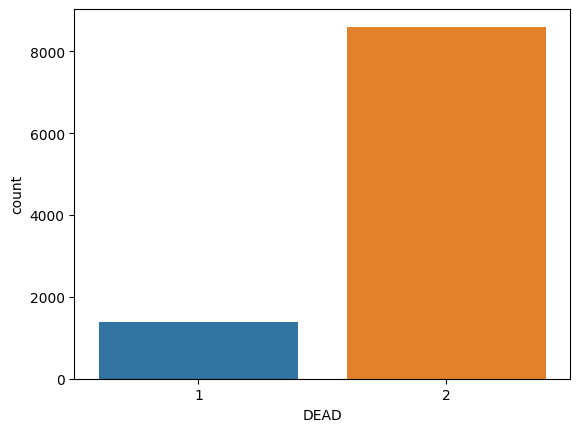

In [31]:
sns.countplot(x='DEAD', data=df_sample)

- El dataset está muy desbalanceado. Tenemos una cantidad considerablemente superior de pacientes que han sobrevivido al COVID-19 frente a los que han fallecido.

### Exploración de las variables

<AxesSubplot: >

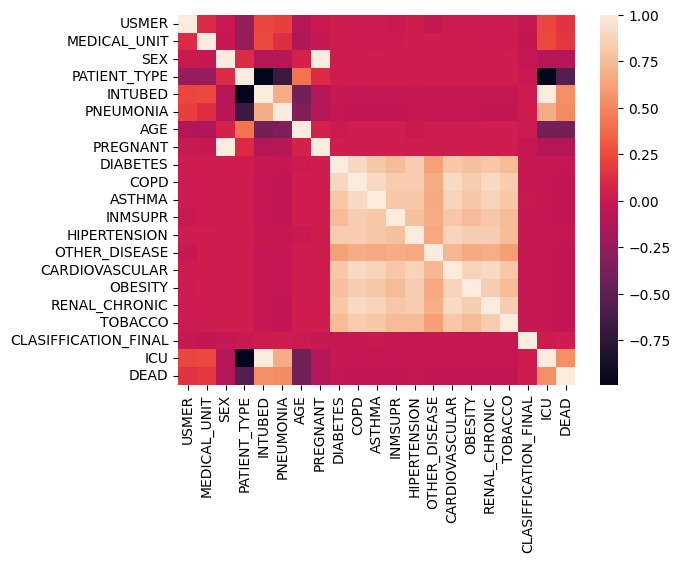

In [32]:
sns.heatmap(df_sample.corr(numeric_only=True), annot=False, cbar=True)

- Existe una fuerte correlación entre todas las afecciones, el tabaquismo y la obesidad. Es decir, la presencia de todas ellas está fuertemente relacionada entre si.

- Las pocas correlaciones que encontramos con con respecto a si el paciente ha fallecido o no son las siguientes:
    - Que el paciente haya vuelto a casa está más relacionado con sobrevivir que si ha sido ingresado
    - Ser intubado está más relacionado con morir que con sobrevivir
    - Ir a la UCI está más relacionado con morir que con sobrevivir
    - Morir está relacionado con una mayor edad. 
    
    Todas estas relaciones también se ven reflejadas entre si: fuerte correlación entre ser intubado y estar en la UCI, entre la edad y estar intubado...

<AxesSubplot: xlabel='AGE', ylabel='DEAD'>

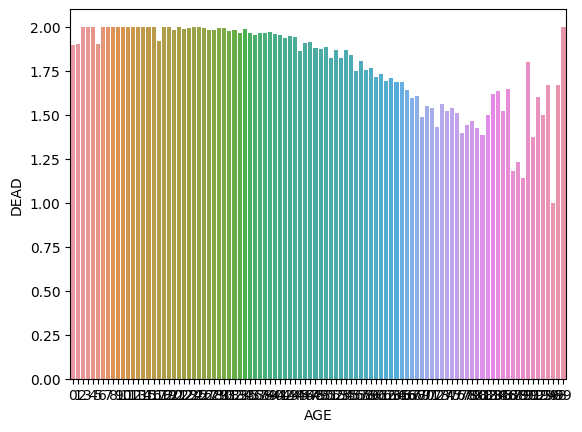

In [33]:
sns.barplot(x='AGE', y='DEAD', data=df_sample, errorbar=None)

**Para poder observar la influencia de la edad de forma más clara agruparemos en los siguientes grupos de edad:**
- Grupo 1: de 0 a 5
- Grupo 2: de 5 a 12
- Grupo 3: de 12 a 18
- Grupo 4: de 18 a 30
- Grupo 5: de 30 a 45
- Grupo 6: de 45 a 60
- Grupo 7: de 60 a 80
- Grupo 8: de 80 a 90
- Grupo 9: de 90 a 100

In [6]:
# bins = [0, 5, 12, 18, 30, 45, 60, 80, 90, 100]
# names = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
# df["AGE"] = pd.cut(df["AGE"], bins, labels = names)

NOTA: dejo comentada la creación de los grupos de edad, puesto que solo es necesario para el análisis exploratorio. El modelo va a ser entrenado con las edades tal y como aparecen en el dataset, y así también podremos introducir la edad de cada paciente sin consultar a qué grupo pertenece. 

<AxesSubplot: xlabel='AGE', ylabel='count'>

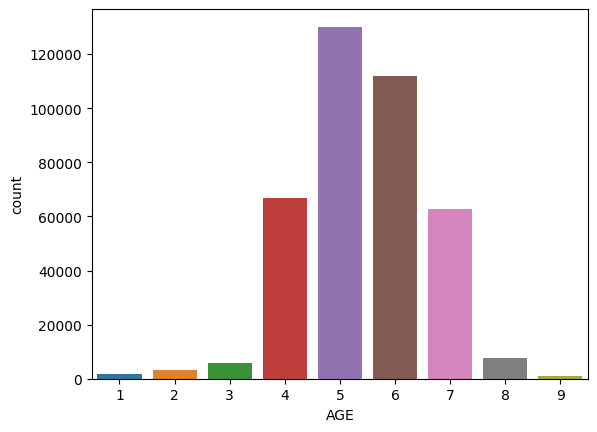

In [8]:
sns.countplot(data = df, x = "AGE")

- En el gráfico anterior podemos observar cómo el número de pacientes estudiados pertenecientes a los grupos de edad más extremos, menores de 5 y mayores de 90 es bastante reducido, en comparación con los pacientes de los grupos de edad más intermedios. Por tanto, nuestro modelo estará sesgado por las tendencias de salud de los rangos de edad mayoritarios. Además de esto, si tenemos en cuenta que las características fisiológicas varían fuertemente con respecto a la edad, siendo especialmente determinante en etapas tempranas y en la vejez, quizá sería interesante elaborar un modelo predictivo específico, al menos para los grupos de edad más extremos.

<AxesSubplot: xlabel='AGE', ylabel='DEAD'>

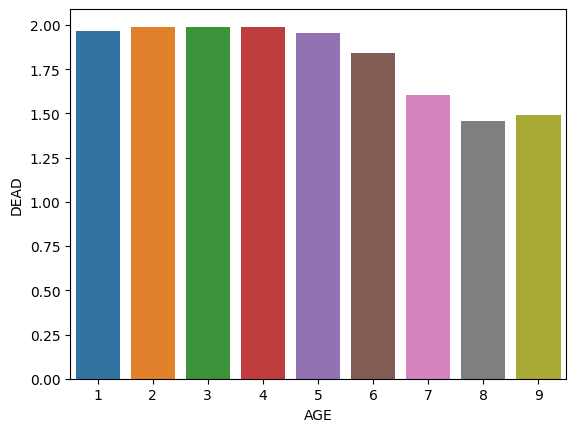

In [10]:
sns.barplot(x='AGE', y='DEAD', data=df, errorbar=None)

- La media de supervivencia se mantiene constante en los grupos "2", "3" y "4" (de 5 a 30 años), denotándose levemente inferior en el grupo "1" (menos de 5 años), lo cual puede estar influenciado no solo por una posible mayor vulnerabilidad en este último rango de edad, sino también por la cantidad de muestra que tenemos para este grupo.

- La media de supervivencia comienza a descender progresivamente a partir del grupo "5", de lo que podemos deducir que la supervivencia se ve afectada negativamente con la edad. Se observa un pequeño repunte en el grupo 9, que seguramente se deba a la poca cantidad de muestra del mismo, ya que hay estudios que ratifican el aumento de la tasa de letalidad del COVID-19 con la edad.

<AxesSubplot: xlabel='SEX', ylabel='DEAD'>

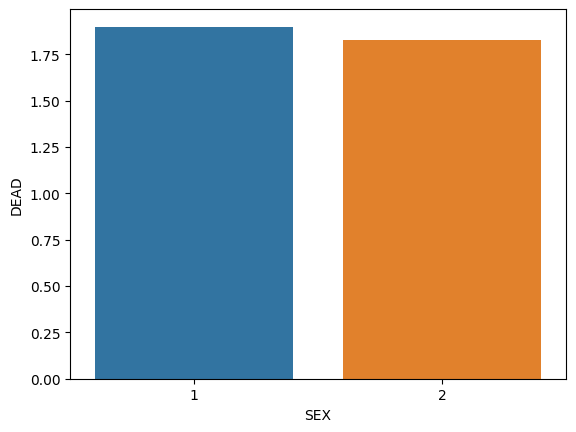

In [37]:
sns.barplot(x='SEX', y='DEAD', data=df_sample, errorbar=None)

- La media de supervivencia es ligeramente superior en mujeres que en hombres

In [38]:
columns_names = df.columns
columns_names_list = list(columns_names)
columns_names_list

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'DATE_DIED',
 'INTUBED',
 'PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL',
 'ICU',
 'DEAD']

In [39]:
features_list = [
    'PNEUMONIA', 
    'DIABETES', 
    'COPD', 
    'ASTHMA', 
    'INMSUPR', 
    'HIPERTENSION', 
    'OTHER_DISEASE', 
    'CARDIOVASCULAR', 
    'OBESITY', 
    'RENAL_CHRONIC', 
    'TOBACCO',
    'PREGNANT'
]

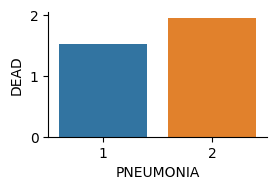

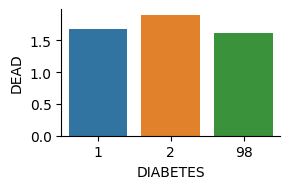

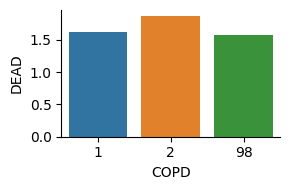

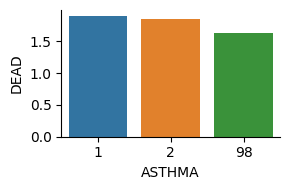

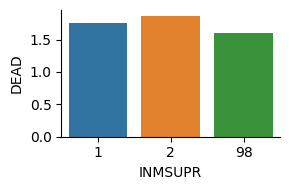

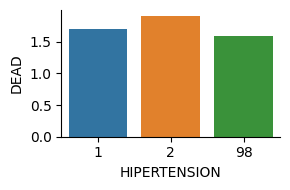

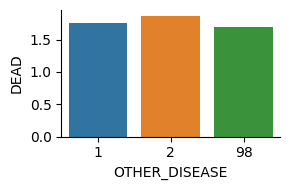

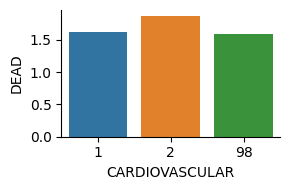

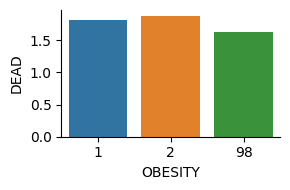

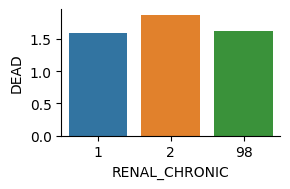

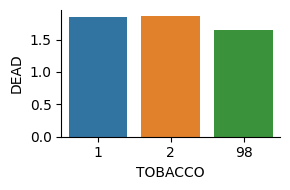

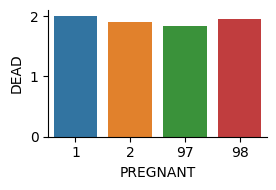

In [40]:
for i in features_list:
    sns.catplot(
        x=i, y="DEAD", legend_out=True, kind="bar", errorbar=None, data=df_sample, height = 2, aspect = 1.5
    )

- Podemos observar como la presencia de afecciones físicas afecta negativamente a la media de supervivencia. 
- Sin embargo, en el caso del asma, observamos un leve incremento de la supervivencia con los pacientes que tienen esta afección. 
- El tabaquismo no parece tener relevancia en la supervivencia, pero como hemos visto en el mapa de correlación, sí que está relacionado con las afecciones físicas presentes en el modelo.
- En cuanto a las personas embarazadas, parece que la supervivencia es prácticamente del 100%. Esto puede deberse a que la edad promedio de embarazo está entre los grupos 4 y 5, donde hemos observado que el nivel de supervivencia es alto. Por otro lado, también puede estar relacionado con un seguimiento más exhaustivo de la salud en una persona embarazada frente a una que no lo está.

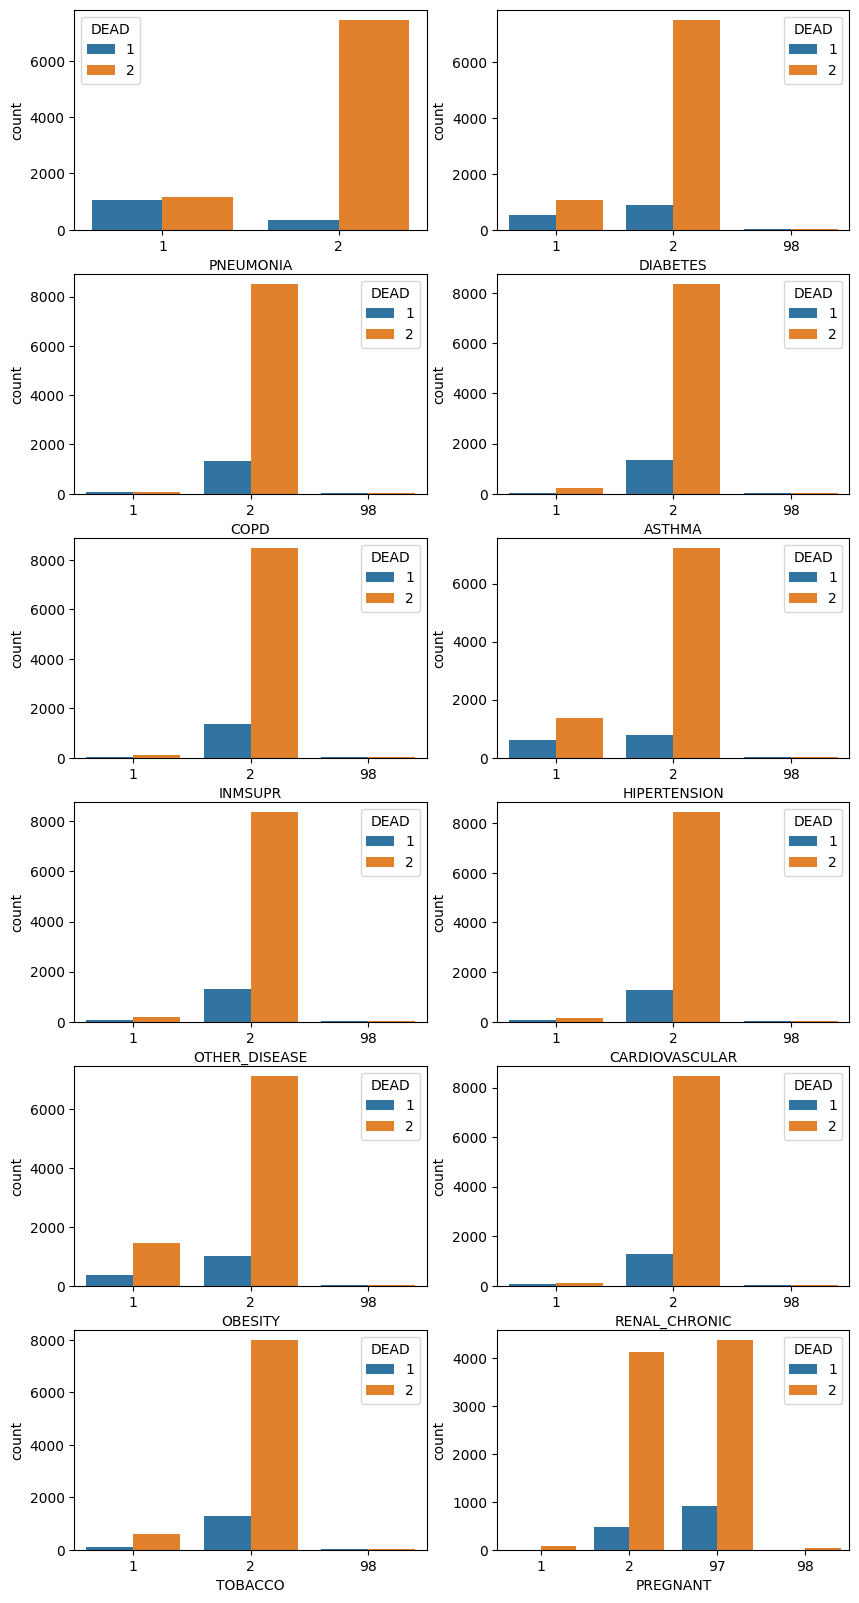

In [41]:
plt.figure(figsize=(10, 20))
ncols = 2

nrows = int(np.ceil(len(features_list) / 2))

for i, col in enumerate(features_list):
  plt.subplot(nrows, ncols, i+1)
  sns.countplot(data=df_sample, x=col, hue="DEAD") 


- Aquí podemos apreciar con muchísima más claridad como proporcionalmente, el número de fallecidos frente a supervivientes cuando se padece o no una de estas afecciones es muy diferente:
    - Neumonía: casi el 50% de afectados de neumonía han fallecido, frente al pequeño porcentaje de fallecidos sin esta afección. En el global, han fallecido muchas más personas con neumonía que sin ella.
    - Diabetes: aproximadamente 1/3 de las personas diagnosticadas con diabetes ha fallecido.
    - Hipertensión: aproximadamente 1/3 de las personas diagnosticadas con hipertensión ha fallecido.
    - Obesidad: aproximadamente 1/4 de las personas clasificadas con obesidad ha fallecido.
    - EPOC: aparentemente el total de los pacientes con esta afección (que no son muchos) ha fallecido.
    - Problemas cardiovasculares y problemas renales: aproximadamente el 50% de afectados han fallecido. No obstante, al ser pocos pacientes dentro de esta clasificación, en el global han fallecido muchas menos personas con este tipo de problemas que sin ellos.
    - Asma: aquí podemos ver como la relación de fallecidos y supervivientes con y sin asma es muy similar, además de ser pocas personas clasificadas con esta afección con respecto al total. Esto explica que en la anterior gráfica tuviese una relación negativa con respecto a la supervivencia.

## Preprocesamiento de los datos

- Antes de realizar el análisis exploratorio, hemos eliminado del dataset a aquellos pacientes que no tienen COVID-19, considerando que era necesario para desarrollar el mismo.
- Existen **valores nulos** en este dataset, traducidos a números enteros. Teniendo en cuenta que es muy probable que no se puedan determinar todas las características descritas en el dataset para todos los pacientes a los que se aplique el modelo, la aplicación del mismo en la vida real es susceptible de ser contener valores nulos. Por tanto, no vamos a hacer ningún tratamiento, entrenaremos los modelos con ellos.
- Las características están descritas de forma categórica (1=SÍ; 2=NO), por lo que los **outlayers** que pudiésemos detectar se corresponderían con la forma numérica de los valores nulos (97 y 99). Por el mismo motivo, no necesitamos hacer ningún tipo de **normalización**.

## Selección de las variables

La fecha de la muerte (DATE_DIED) ha sido útil para generar la variable objetivo ("DEAD"), pero tal y como está no nos aporta ningún tipo de información, por lo que la eliminaremos:

In [10]:
df.drop(['DATE_DIED'], axis=1, inplace=True)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
2,2,1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,1
4,2,1,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,1
5,2,1,1,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2,2
6,2,1,1,1,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97,2


## Entrenamiento de los modelos

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def show_metrics(clf, y_test, y_pred):
    print(f'Accuracy score: {int(accuracy_score(y_test, y_pred)*100)}%\n')
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("DEAD", axis=1)
y = df["DEAD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Tal y como hemos observado en el análisis exploratorio, los datos están muy desbalanceados, por lo que hay que compensarlos. Como tenemos muchos datos, emplearemos **undersampling**:

In [13]:
train_df = pd.concat([X_train, y_train], axis=1)

extra_noes = len(train_df[train_df.DEAD == 2]) - len(train_df[train_df.DEAD == 1])
print(train_df.DEAD.value_counts())

new_train_df = train_df.sample(frac=1)
new_train_df = train_df.drop(train_df[train_df.DEAD == 2].tail(extra_noes).index)

print(new_train_df.DEAD.value_counts())

X_train = new_train_df.drop("DEAD", axis=1)
y_train = new_train_df["DEAD"]

2    270204
1     43379
Name: DEAD, dtype: int64
2    43379
1    43379
Name: DEAD, dtype: int64


#### Regresión logística

Accuracy score: 86%

              precision    recall  f1-score   support

           1       0.51      0.90      0.65     10857
           2       0.98      0.86      0.92     67539

    accuracy                           0.86     78396
   macro avg       0.74      0.88      0.78     78396
weighted avg       0.92      0.86      0.88     78396



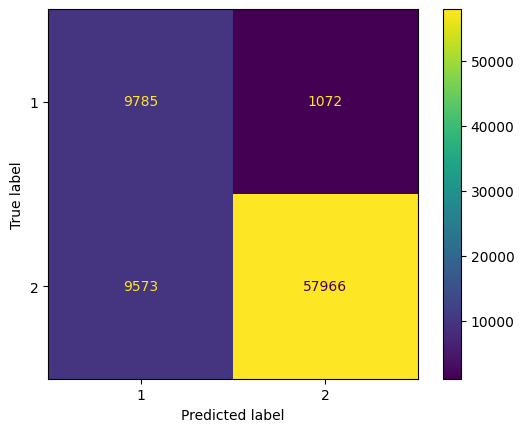

Accuracy score: 86%

              precision    recall  f1-score   support

           1       0.51      0.90      0.65     10857
           2       0.98      0.86      0.92     67539

    accuracy                           0.86     78396
   macro avg       0.74      0.88      0.78     78396
weighted avg       0.92      0.86      0.88     78396



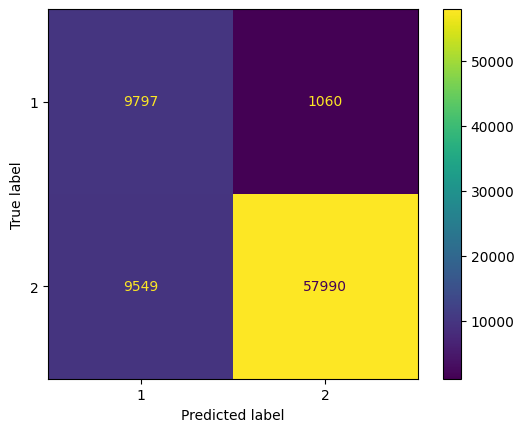

/home/angela/data-science/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 85%

              precision    recall  f1-score   support

           1       0.50      0.90      0.64     10857
           2       0.98      0.85      0.91     67539

    accuracy                           0.86     78396
   macro avg       0.74      0.88      0.78     78396
weighted avg       0.91      0.86      0.88     78396



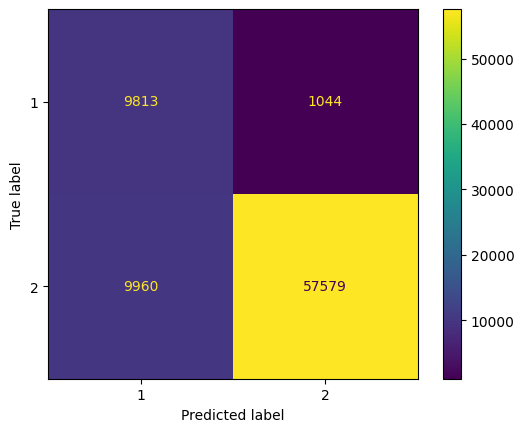

/home/angela/data-science/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score: 86%

              precision    recall  f1-score   support

           1       0.50      0.90      0.64     10857
           2       0.98      0.86      0.91     67539

    accuracy                           0.86     78396
   macro avg       0.74      0.88      0.78     78396
weighted avg       0.92      0.86      0.88     78396



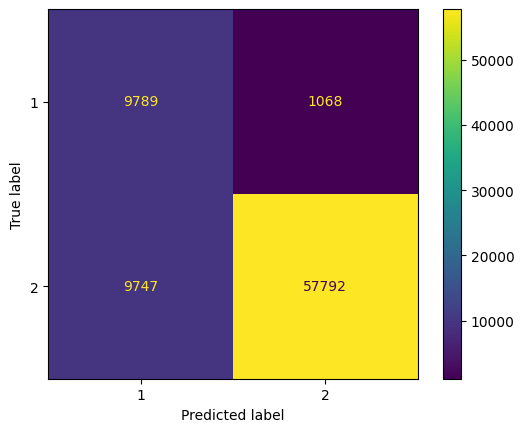

/home/angela/data-science/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score: 85%

              precision    recall  f1-score   support

           1       0.50      0.90      0.64     10857
           2       0.98      0.85      0.91     67539

    accuracy                           0.86     78396
   macro avg       0.74      0.88      0.78     78396
weighted avg       0.91      0.86      0.87     78396



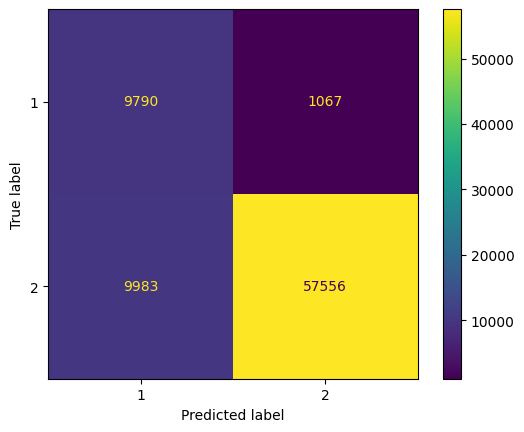

[(LogisticRegression(solver='liblinear'), 0.8642150109699475),
 (LogisticRegression(solver='newton-cg'), 0.8646742180723507),
 (LogisticRegression(), 0.8596356956987602),
 (LogisticRegression(solver='sag'), 0.8620465329863769),
 (LogisticRegression(solver='saga'), 0.8590489310679116)]

In [14]:
from sklearn.linear_model import LogisticRegression

algorithm_accuracy = []

solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
for solver in solvers:
    logreg = LogisticRegression(solver=solver, multi_class='auto')
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)

    show_metrics(logreg, y_test, y_pred)

    algorithm_accuracy.append((logreg, accuracy_score(y_test, y_pred)))

algorithm_accuracy

- El porcentaje de personas que el modelo ha clasíficado como supervivientes que en realidad no lo son, frente al total de fallecidos, es aproximadamente el 10% para todos los solvers. Teniendo en cuenta lo delicado de esta cuestión, tenemos que buscar que este porcentaje sea lo más bajo posible. Desde un punto de vista sanitario, es preferible pensar que alguien está en riesgo de muerte, a pesar de que al final no lo esté, que no detectar un riesgo de muerte real y no tomar las medidas oportunas. 

#### Naïve Bayes

Accuracy score: 83%

              precision    recall  f1-score   support

           1       0.45      0.88      0.60     10857
           2       0.98      0.83      0.90     67539

    accuracy                           0.84     78396
   macro avg       0.72      0.85      0.75     78396
weighted avg       0.90      0.84      0.86     78396



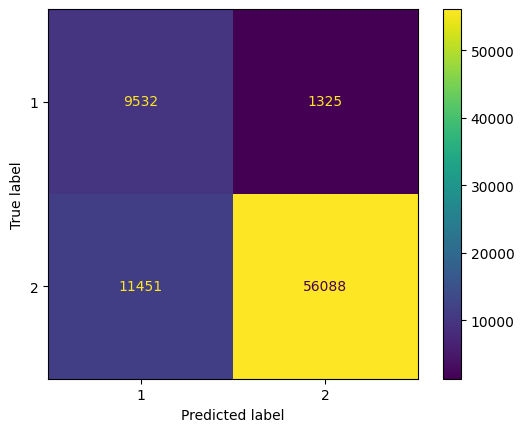

[(LogisticRegression(solver='liblinear'), 0.8642150109699475),
 (LogisticRegression(solver='newton-cg'), 0.8646742180723507),
 (LogisticRegression(), 0.8596356956987602),
 (LogisticRegression(solver='sag'), 0.8620465329863769),
 (LogisticRegression(solver='saga'), 0.8590489310679116),
 (GaussianNB(), 0.8370325016582478),
 (GaussianNB(), 0.8370325016582478)]

In [16]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
show_metrics(gaussian, y_test, y_pred)

algorithm_accuracy.append((gaussian, accuracy))

algorithm_accuracy

- Con este modelo no solo obtenemos un menor accuracy, sino que el número de predicciones que apuntan a la supervivencia que en realidad son fallecimientos es mayor que en todas las variantes de regresión logística.

#### Decision Tree

Accuracy score: 84%

              precision    recall  f1-score   support

           1       0.46      0.88      0.61     10857
           2       0.98      0.84      0.90     67539

    accuracy                           0.84     78396
   macro avg       0.72      0.86      0.75     78396
weighted avg       0.91      0.84      0.86     78396



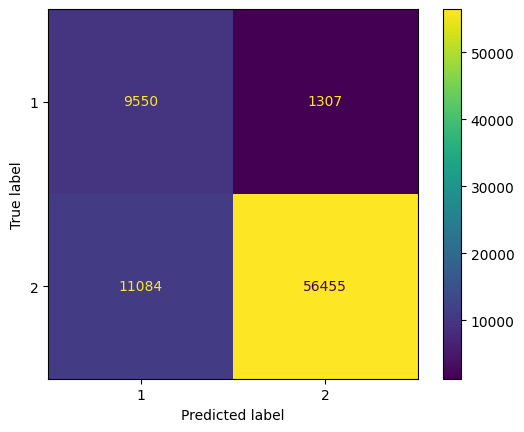

[(LogisticRegression(solver='liblinear'), 0.8642150109699475),
 (LogisticRegression(solver='newton-cg'), 0.8646742180723507),
 (LogisticRegression(), 0.8596356956987602),
 (LogisticRegression(solver='sag'), 0.8620465329863769),
 (LogisticRegression(solver='saga'), 0.8590489310679116),
 (GaussianNB(), 0.8370325016582478),
 (GaussianNB(), 0.8370325016582478),
 (DecisionTreeClassifier(), 0.8418159089749477),
 (DecisionTreeClassifier(), 0.841943466503393)]

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)

show_metrics(decision_tree, y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

algorithm_accuracy.append((decision_tree, accuracy))

algorithm_accuracy

- Con "Decision Tree" tenemos mayor accuracy y menor número de falsos supervivientes que con "Naïve Bayes", sin embargo, seguimos obteniendo mejores resultados con la "Regresión Logística".

#### Random forest

Accuracy score: 85%

              precision    recall  f1-score   support

           1       0.49      0.90      0.63     10857
           2       0.98      0.85      0.91     67539

    accuracy                           0.86     78396
   macro avg       0.74      0.88      0.77     78396
weighted avg       0.91      0.86      0.87     78396



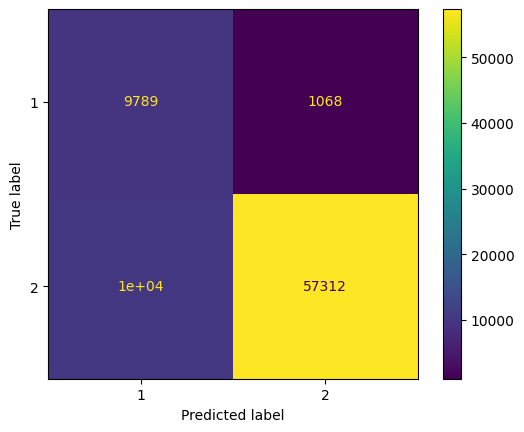

[(LogisticRegression(solver='liblinear'), 0.8642150109699475),
 (LogisticRegression(solver='newton-cg'), 0.8646742180723507),
 (LogisticRegression(), 0.8596356956987602),
 (LogisticRegression(solver='sag'), 0.8620465329863769),
 (LogisticRegression(solver='saga'), 0.8590489310679116),
 (GaussianNB(), 0.8370325016582478),
 (GaussianNB(), 0.8370325016582478),
 (DecisionTreeClassifier(), 0.8418159089749477),
 (DecisionTreeClassifier(), 0.841943466503393),
 (RandomForestClassifier(), 0.8557451910811776),
 (RandomForestClassifier(), 0.8559237716210011)]

In [20]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

show_metrics(random_forest, y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

algorithm_accuracy.append((random_forest, accuracy))

algorithm_accuracy

- En el caso del "Random Forest" los resultados son bastante parecidos a los de la "Regresión Logística", que hasta ahora ha dado los mejores resultados. 

- Relevancia de las distintas variables:

In [31]:
importances = pd.DataFrame(
    {'feature':df.drop("DEAD", axis=1).columns,
     'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
AGE,0.206
PATIENT_TYPE,0.176
INTUBED,0.170
ICU,0.158
PNEUMONIA,0.123
MEDICAL_UNIT,0.048
HIPERTENSION,0.021
DIABETES,0.018
USMER,0.015


- Tal y como ya habíamos descrito en el análisis exploratorio la edad es muy influyente en la supervivencia, con una tendencia muy clara de aumento progresivo de la mortalidad con el aumento de la edad.
- A continuación tenemos las variables relacionadas con el tratamiento, derivación y clasificaciones dentro del hospital. Como ya vimos en el mapa de correlación, todas ellas están relacionadas con el riesgo de muerte. Variables como la intubación (que es un tratamiento muy invasivo y extremo), ingreso en el hospital, traslado a la UCI... están relacionadas directamente con la gravedad del paciente, que a su vez está relacionada con las probabilidades de supervivencia.
- Después tenemos las afecciones físicas que habíamos descrito como más decisivas.
- En último lugar tenemos el embarazo y el sexo, y las afecciones que habían aparecido como menos relevantes para la supervivencia, debido posiblemente a tener una menor representatividad en el dataset con respecto a las demás.

#### K-nearest-neighbors

Cálculo del valor de "k" más óptimo:

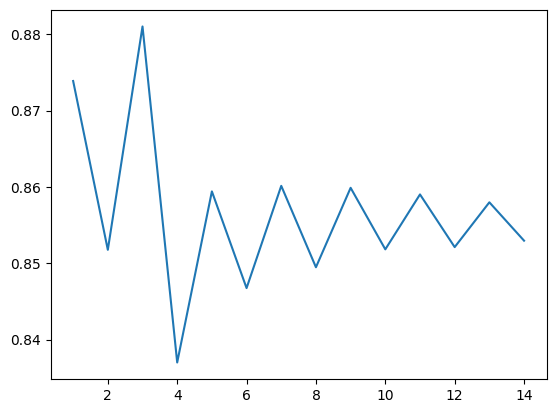

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# experimenting with different n values
k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.show()

Accuracy score: 88%

              precision    recall  f1-score   support

           1       0.55      0.74      0.63     10857
           2       0.96      0.90      0.93     67539

    accuracy                           0.88     78396
   macro avg       0.75      0.82      0.78     78396
weighted avg       0.90      0.88      0.89     78396



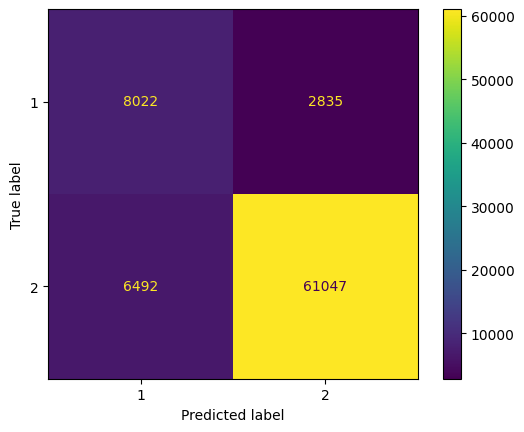

[(LogisticRegression(solver='liblinear'), 0.8642150109699475),
 (LogisticRegression(solver='newton-cg'), 0.8646742180723507),
 (LogisticRegression(), 0.8596356956987602),
 (LogisticRegression(solver='sag'), 0.8620465329863769),
 (LogisticRegression(solver='saga'), 0.8590489310679116),
 (GaussianNB(), 0.8370325016582478),
 (GaussianNB(), 0.8370325016582478),
 (DecisionTreeClassifier(), 0.8418159089749477),
 (DecisionTreeClassifier(), 0.841943466503393),
 (RandomForestClassifier(), 0.8557451910811776),
 (RandomForestClassifier(), 0.8559237716210011),
 (KNeighborsClassifier(n_neighbors=3), 0.8810270932190418)]

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

show_metrics(knn, y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

algorithm_accuracy.append((knn, accuracy))

algorithm_accuracy

- "K-nearest-neighbors" nos ofrece el accuracy más alto, sin embargo, es el modelo que más falsos supervivientes da, por lo que no nos sirve.

#### Support Vector Machines

Accuracy score: 84%

              precision    recall  f1-score   support

           1       0.47      0.95      0.63     10857
           2       0.99      0.83      0.90     67539

    accuracy                           0.85     78396
   macro avg       0.73      0.89      0.77     78396
weighted avg       0.92      0.85      0.86     78396



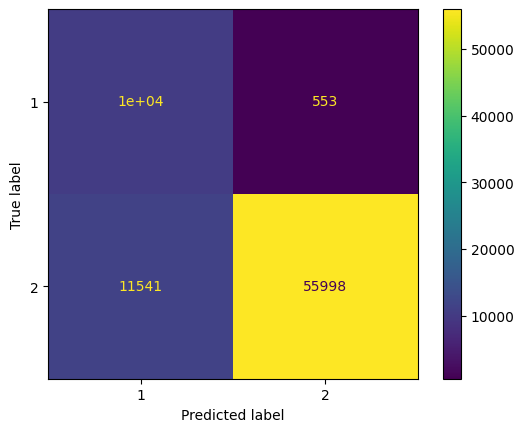

[(LogisticRegression(solver='liblinear'), 0.8642150109699475),
 (LogisticRegression(solver='newton-cg'), 0.8646742180723507),
 (LogisticRegression(), 0.8596356956987602),
 (LogisticRegression(solver='sag'), 0.8620465329863769),
 (LogisticRegression(solver='saga'), 0.8590489310679116),
 (GaussianNB(), 0.8370325016582478),
 (GaussianNB(), 0.8370325016582478),
 (DecisionTreeClassifier(), 0.8418159089749477),
 (DecisionTreeClassifier(), 0.841943466503393),
 (RandomForestClassifier(), 0.8557451910811776),
 (RandomForestClassifier(), 0.8559237716210011),
 (KNeighborsClassifier(n_neighbors=3), 0.8810270932190418),
 (SVC(gamma='auto'), 0.8457319250982193)]

In [23]:
from sklearn.svm import SVC, LinearSVC

linear_svc = SVC(gamma='auto')
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

show_metrics(linear_svc, y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

algorithm_accuracy.append((linear_svc, accuracy))

algorithm_accuracy

- Este método no tiene el accuracy más alto, aunque está dentro de la media general de los anteriores. Sin embargo, es el algoritmo que menos falsos supervivientes tiene con diferencia: aproximadamente el 50% menos de falsos supervivientes que el resto de modelos. Por otro lado, la cantidad de falsos pacientes con riesgo de morir es bastante alta, por lo que quizá sea demasiado alarmista.

A continuación vamos a probar la predicción con los algoritmos "Support Vector Machines" y "Regresión Lineal", ya que son los que aparentemente encajan con lo que buscamos.

Regresión Logística:

In [37]:
new_patient = {
    'USMER': 2,
    'MEDICAL_UNIT': 3,
    'SEX': 1,
    'PATIENT_TYPE': 1,
    'INTUBED': 2,
    'PNEUMONIA': 2,
    'AGE': 20,
    'PREGNANT': 97,
    'DIABETES': 2,
    'COPD': 2,
    'ASTHMA': 2,
    'INMSUPR': 2,
    'HIPERTENSION': 2,
    'OTHER_DISEASE': 2,
    'CARDIOVASCULAR': 2,
    'OBESITY': 2,
    'RENAL_CHRONIC': 2,
    'TOBACCO': 2,
    'CLASIFFICATION_FINAL': 2,
    'ICU': 2,
}


patient_df = pd.DataFrame(np.array([list(new_patient.values())]), columns=df.drop("DEAD", axis=1).columns)

predictions = logreg.predict(patient_df) 


if predictions[0] == 1:
    print("Según este modelo, se debe considerar el riesgo de muerte para el paciente")
else:
    print("Según este modelo, el paciente no está en riesgo de muerte")


Según este modelo, el paciente no está en riesgo de muerte


Support Vector Machines:

In [38]:
new_patient = {
    'USMER': 2,
    'MEDICAL_UNIT': 3,
    'SEX': 1,
    'PATIENT_TYPE': 1,
    'INTUBED': 2,
    'PNEUMONIA': 2,
    'AGE': 20,
    'PREGNANT': 97,
    'DIABETES': 2,
    'COPD': 2,
    'ASTHMA': 2,
    'INMSUPR': 2,
    'HIPERTENSION': 2,
    'OTHER_DISEASE': 2,
    'CARDIOVASCULAR': 2,
    'OBESITY': 2,
    'RENAL_CHRONIC': 2,
    'TOBACCO': 2,
    'CLASIFFICATION_FINAL': 2,
    'ICU': 2,
}

patient_df = pd.DataFrame(np.array([list(new_patient.values())]), columns=df.drop("DEAD", axis=1).columns)

predictions = linear_svc.predict(patient_df)  

if predictions[0] == 1:
    print("Según este modelo, se debe considerar el riesgo de muerte para el paciente")
else:
    print("Según este modelo, el paciente no está en riesgo de muerte")

Según este modelo, se debe considerar el riesgo de muerte para el paciente


Hemos dado valores de entrada que, según lo visto en el análisis exploratorio, se corresponden con un paciente cuyo riesgo de mortalidad por COVID-19 no debería ser relevante. Sin embargo, el modelo de "Support Vector Machines" considera que está en riesgo de muerte. Por tanto confirmamos que es un modelo demasiado alarmista. 

Finalmente, después de esta prueba, y visto lo analizado anteriormente, el modelo entrenado con el algoritmo de **"Regresión Logística"** parece el más óptimo.